In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
929,2020-07-09,United Kingdom,287223.0,286979.0,44470.0,44517.0,244.0,-47.0
930,2020-07-09,Germany,197803.0,197783.0,9052.0,9048.0,20.0,4.0
931,2020-07-09,Iran,248923.0,248379.0,12073.0,12084.0,544.0,-11.0
932,2020-07-09,Turkey,208928.0,208938.0,5275.0,5282.0,-10.0,-7.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2781.2922912205568
RMSE =  6799.500644295676


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  307.67344753747324
RMSE =  709.3173430473497


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  13990.472527472528
RMSE =  18015.367330558238
-- World performances for deaths --
MAE =  1577.3186813186812
RMSE =  1917.3748479867747


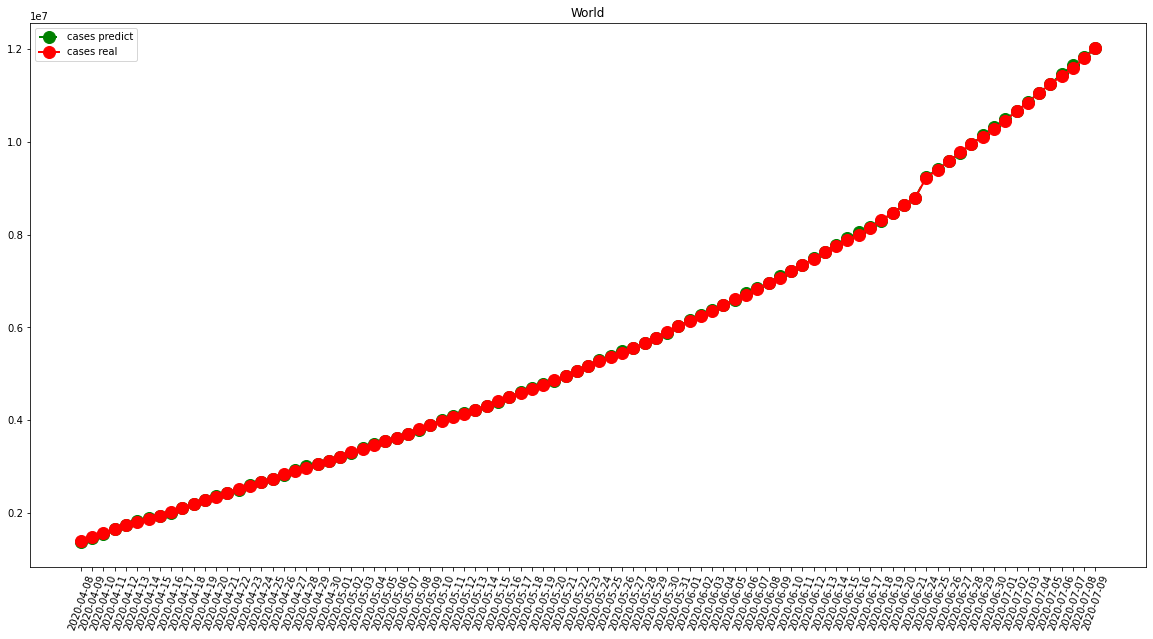

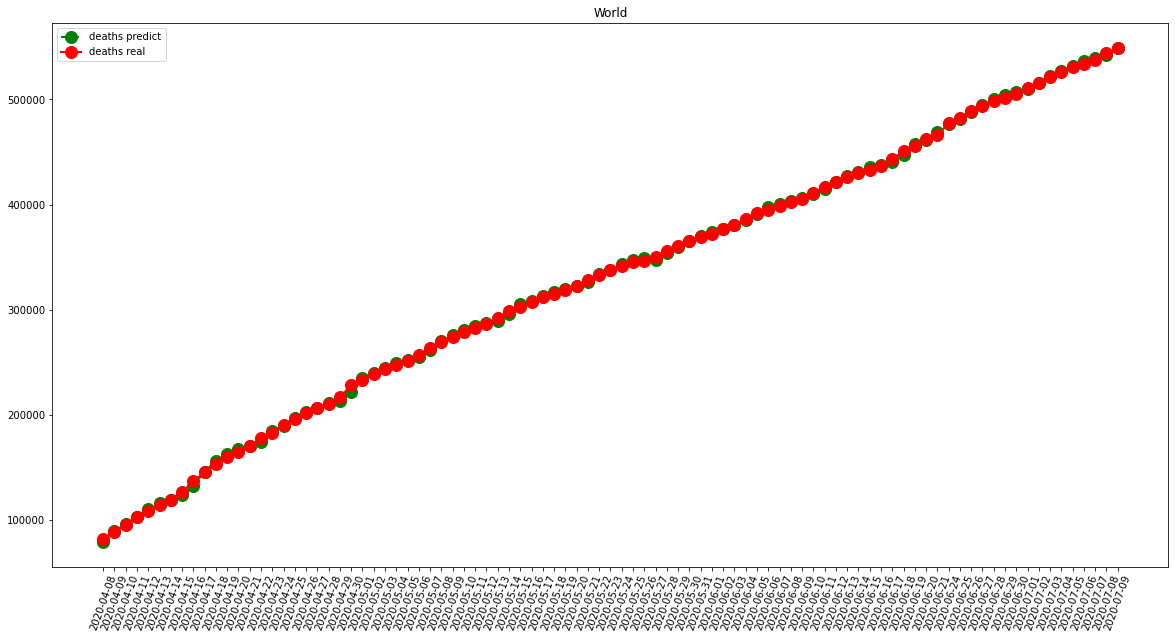

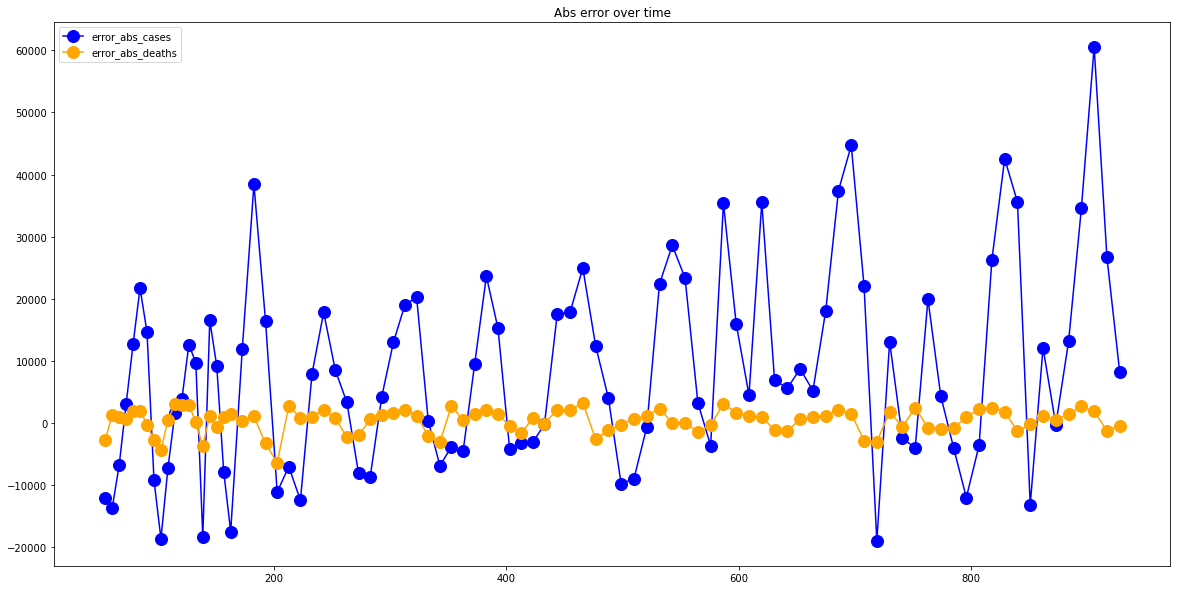

In [7]:
visShow("World")

-- France performances for cases --
MAE =  874.7920792079208
RMSE =  1442.6539693382904
-- France performances for deaths --
MAE =  174.87128712871288
RMSE =  333.2904361836462


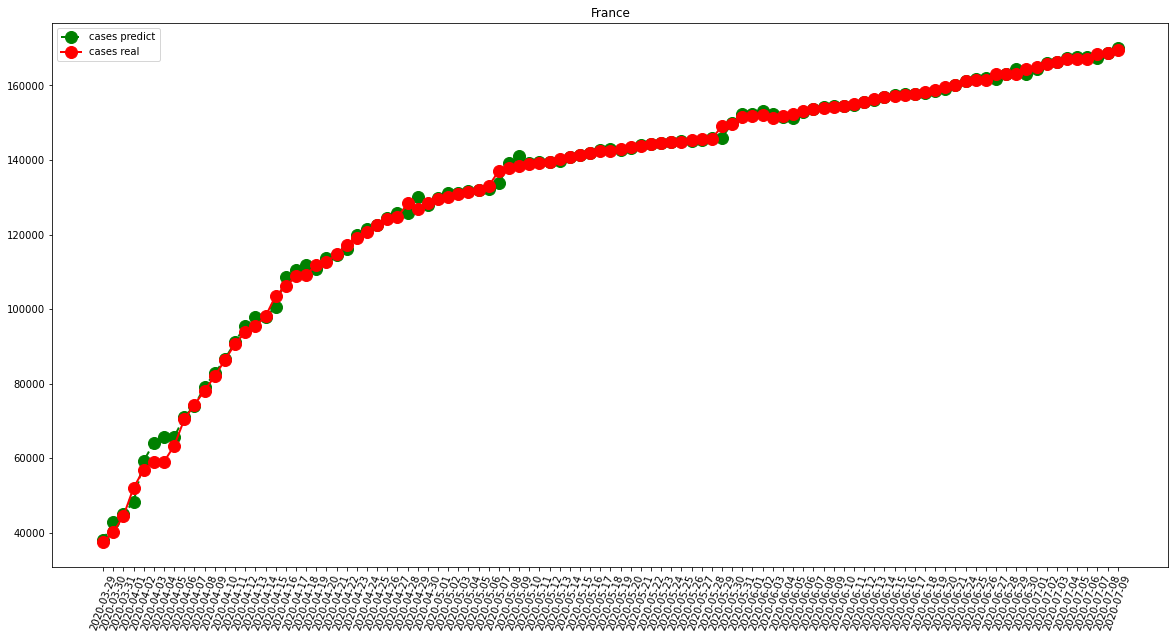

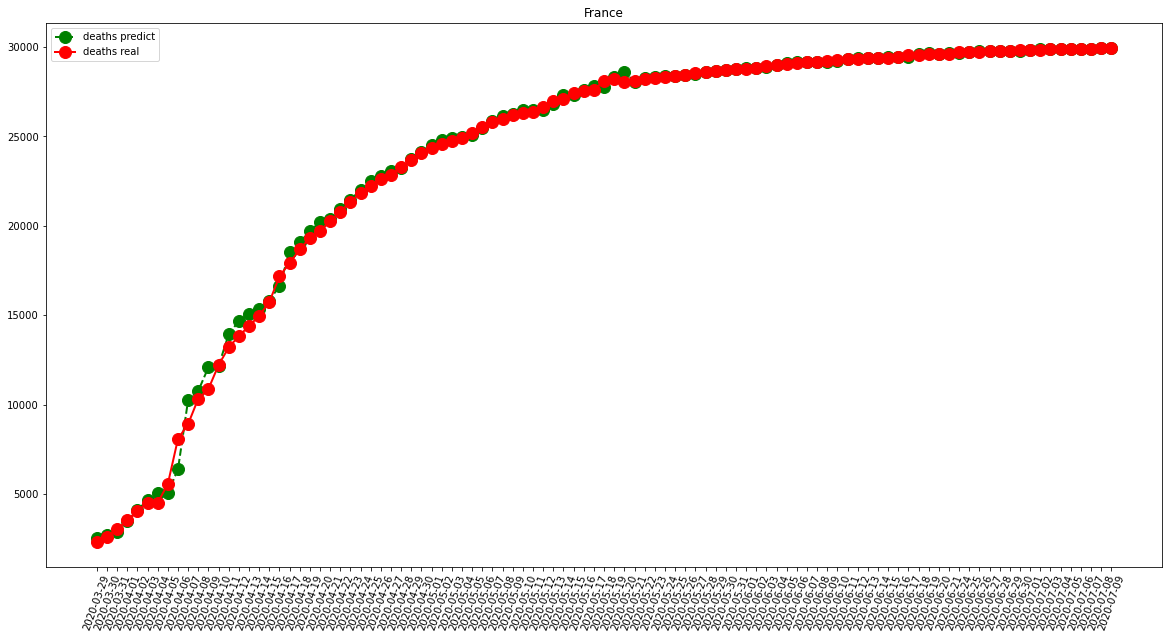

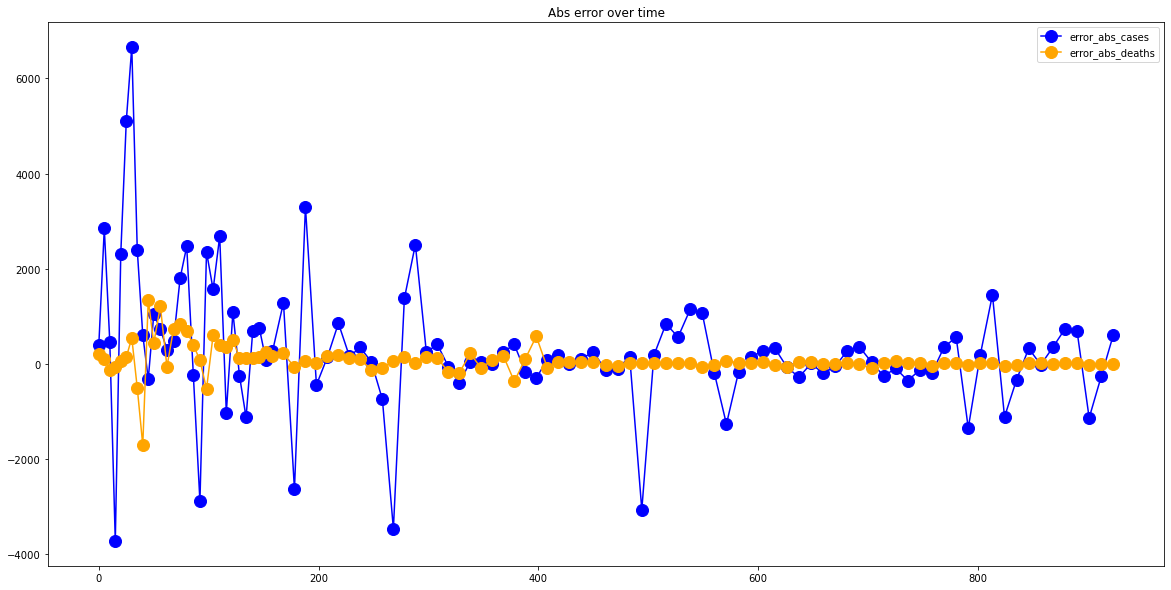

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  370.1287128712871
RMSE =  540.0272728719768
-- Italy performances for deaths --
MAE =  96.64356435643565
RMSE =  294.26658284993596


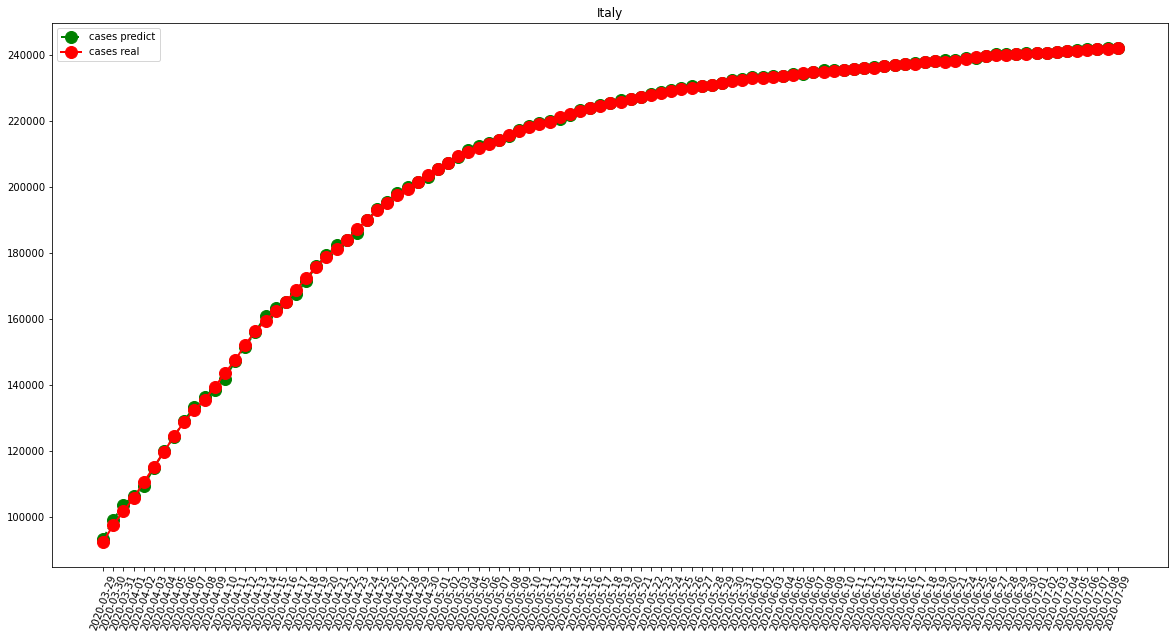

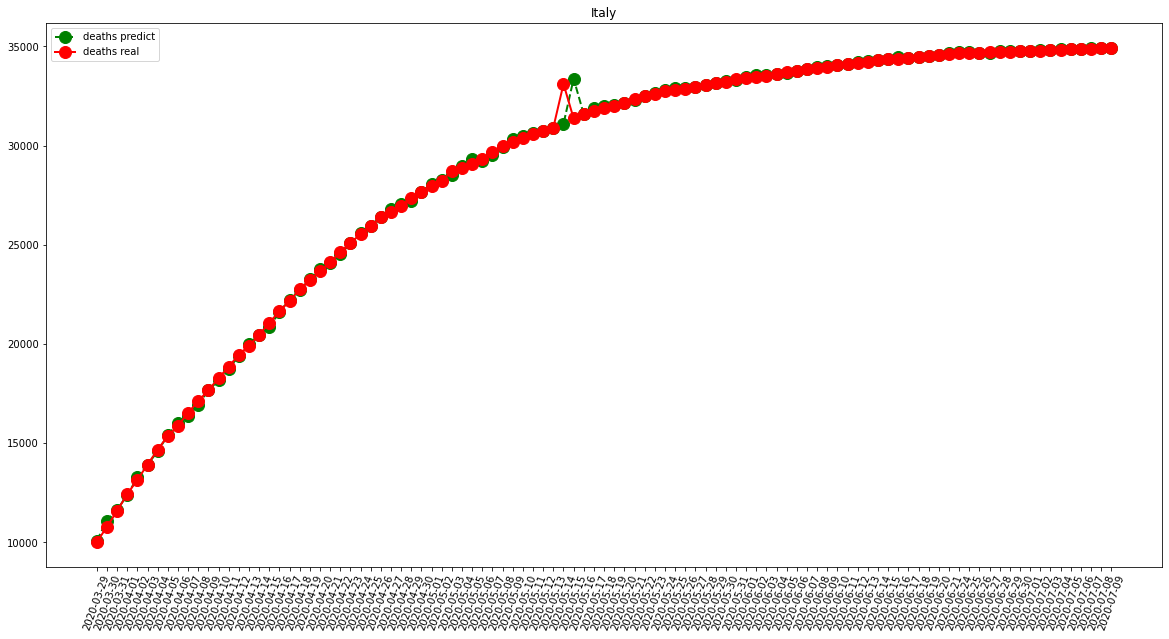

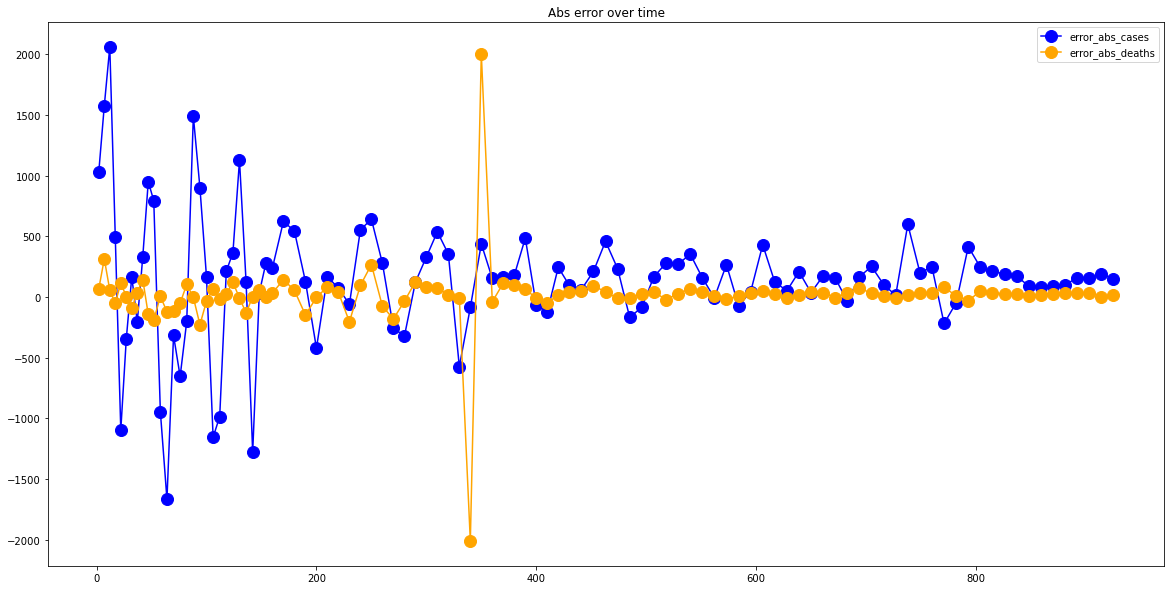

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  852.4752475247525
RMSE =  2039.8059070935797
-- Spain performances for deaths --
MAE =  179.75247524752476
RMSE =  403.87130339127873


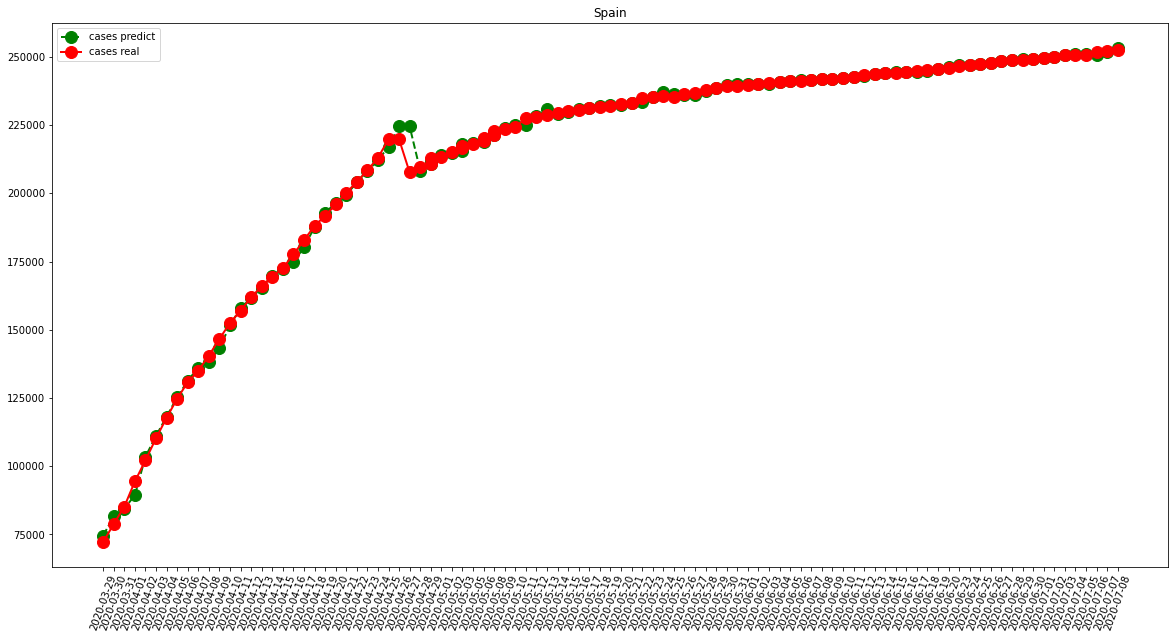

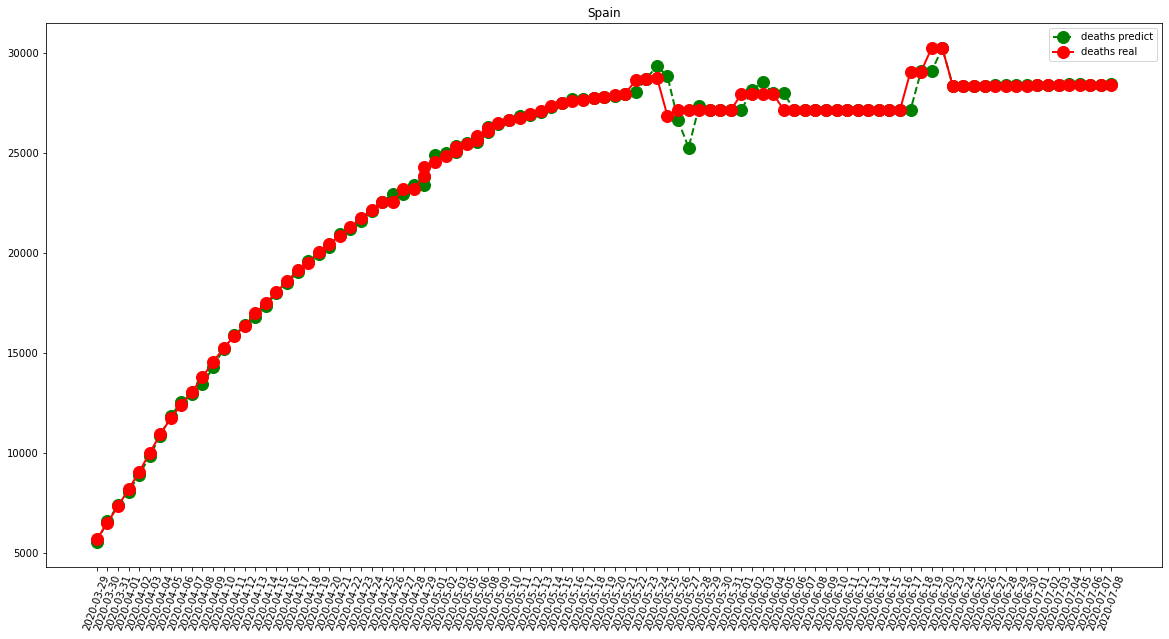

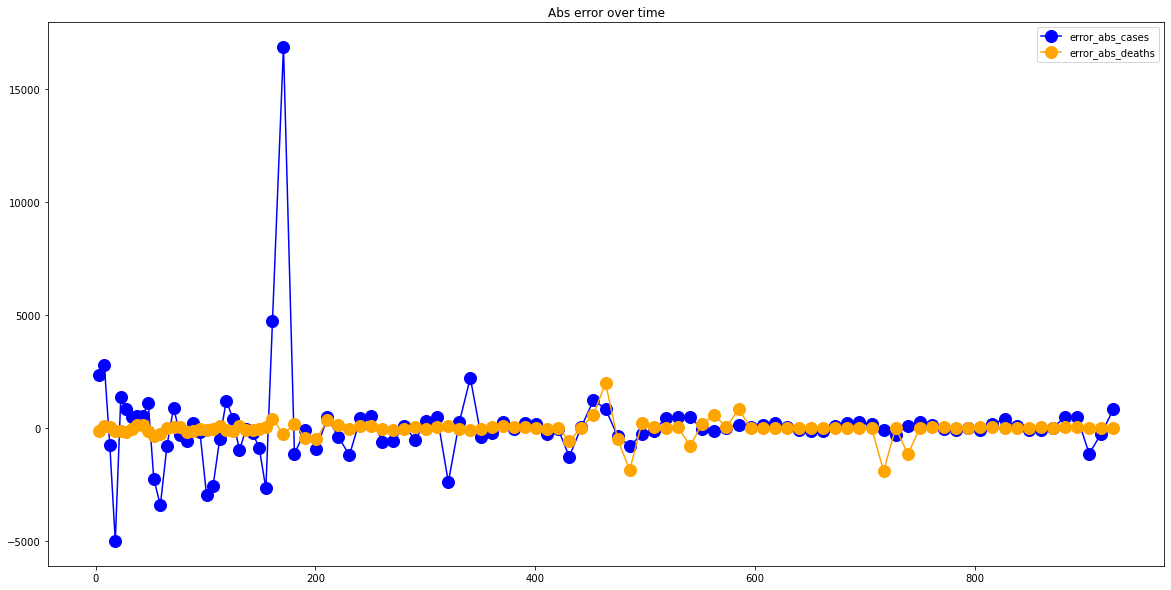

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  4975.0
RMSE =  6777.097906161824
-- United States performances for deaths --
MAE =  535.5346534653465
RMSE =  778.8455851736944


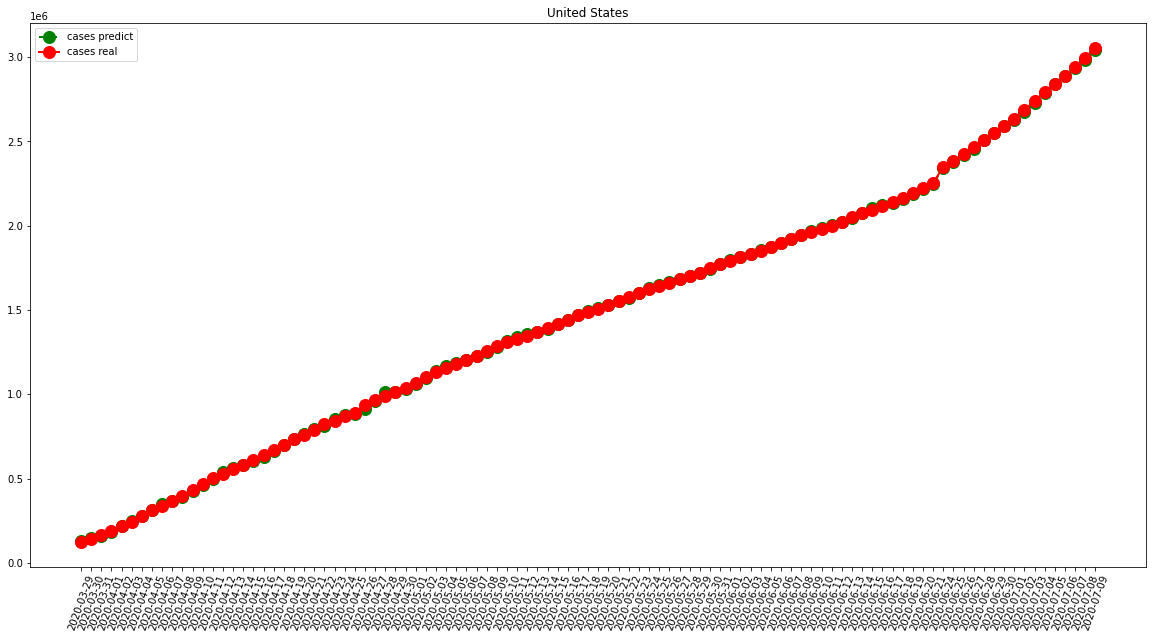

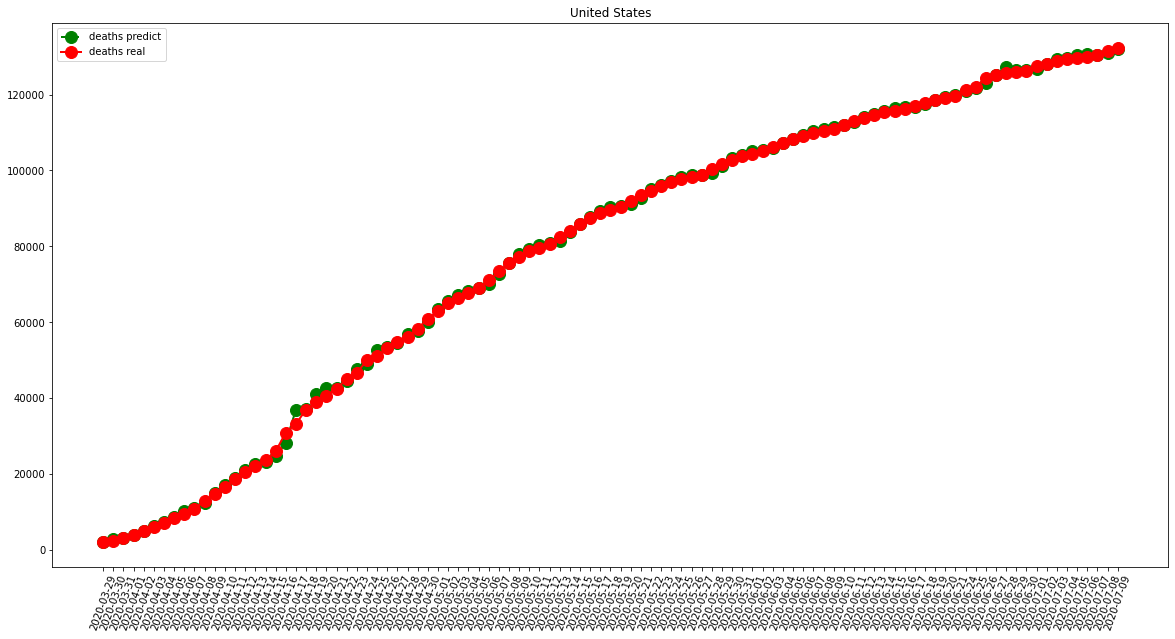

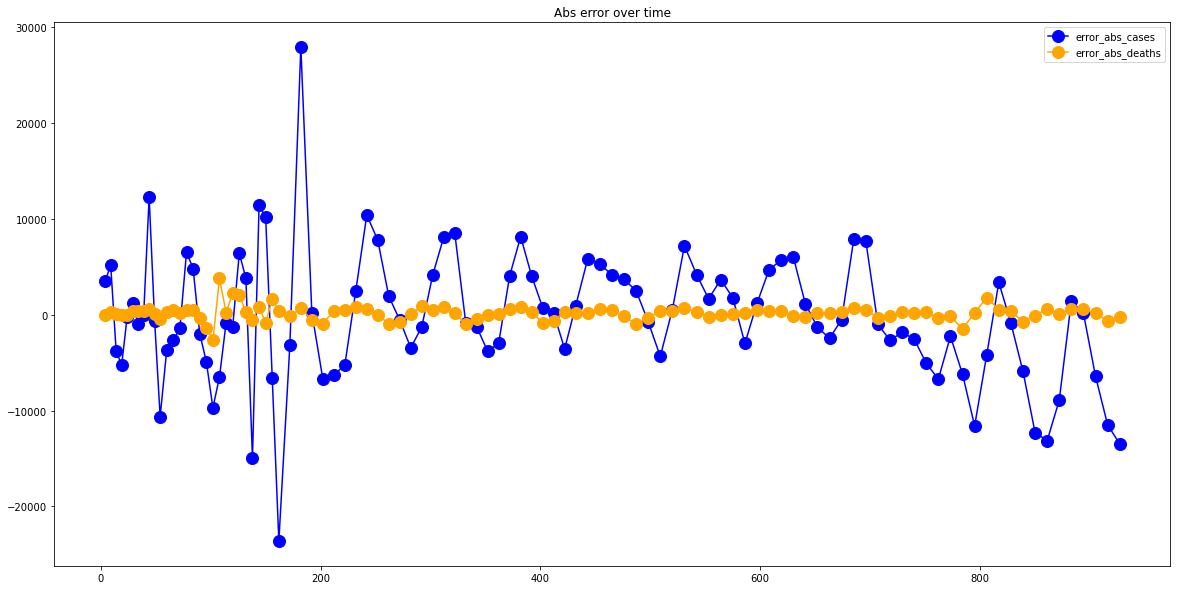

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  88.51485148514851
RMSE =  117.29787755627943
-- China performances for deaths --
MAE =  38.13861386138614
RMSE =  156.17488293386342


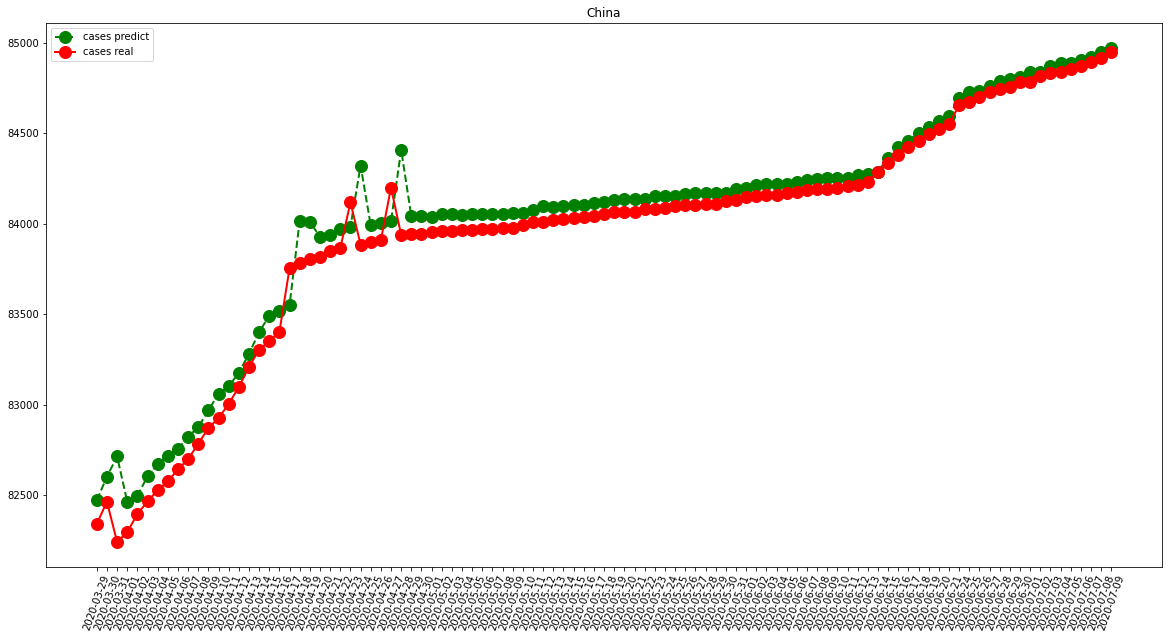

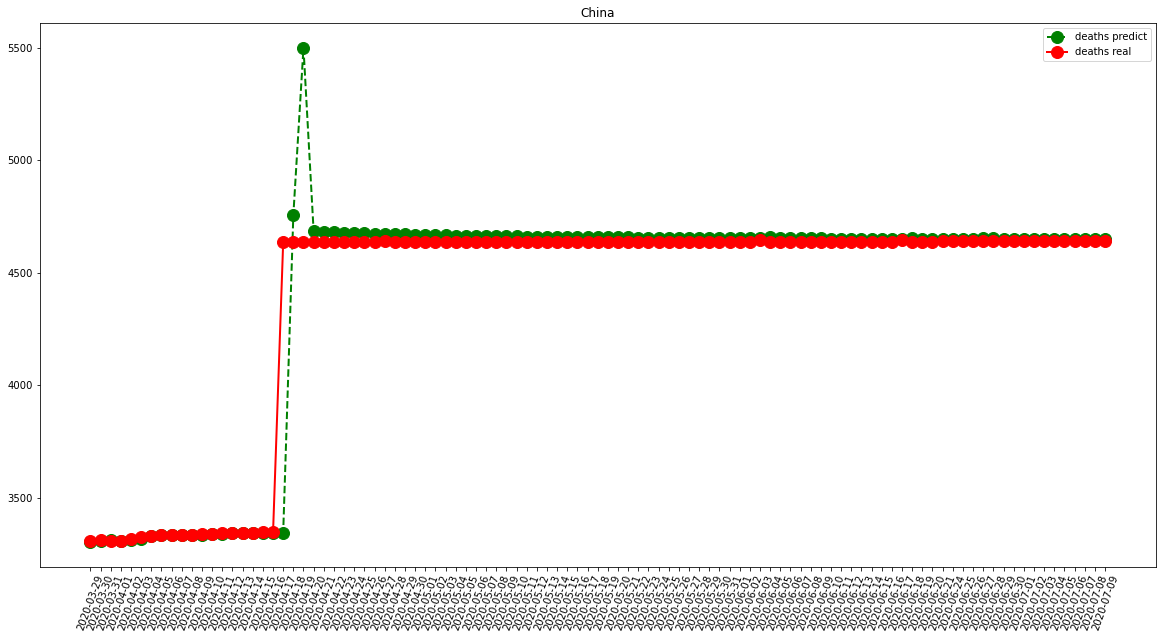

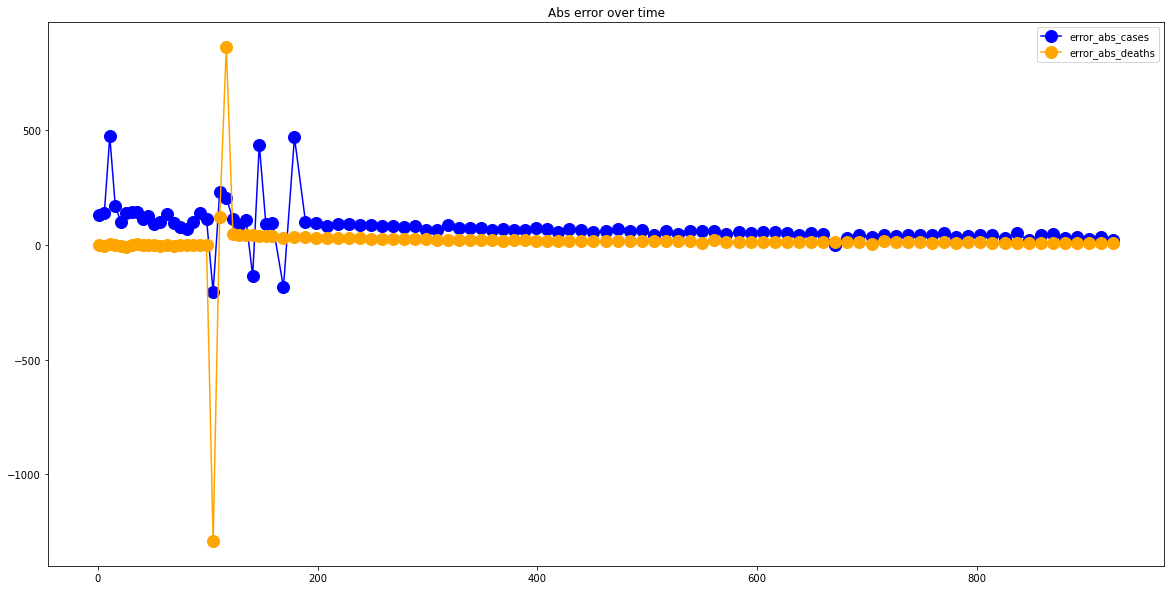

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1577.2602739726028
RMSE =  4880.617847705602
-- United Kingdom performances for deaths --
MAE =  241.02739726027397
RMSE =  572.4615318774285


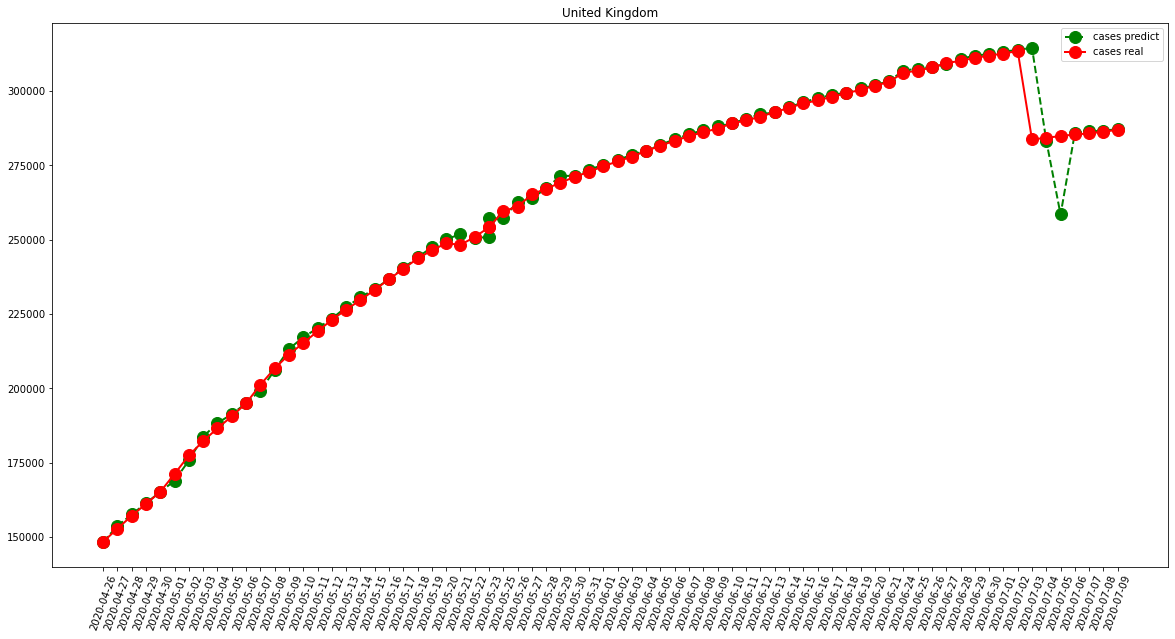

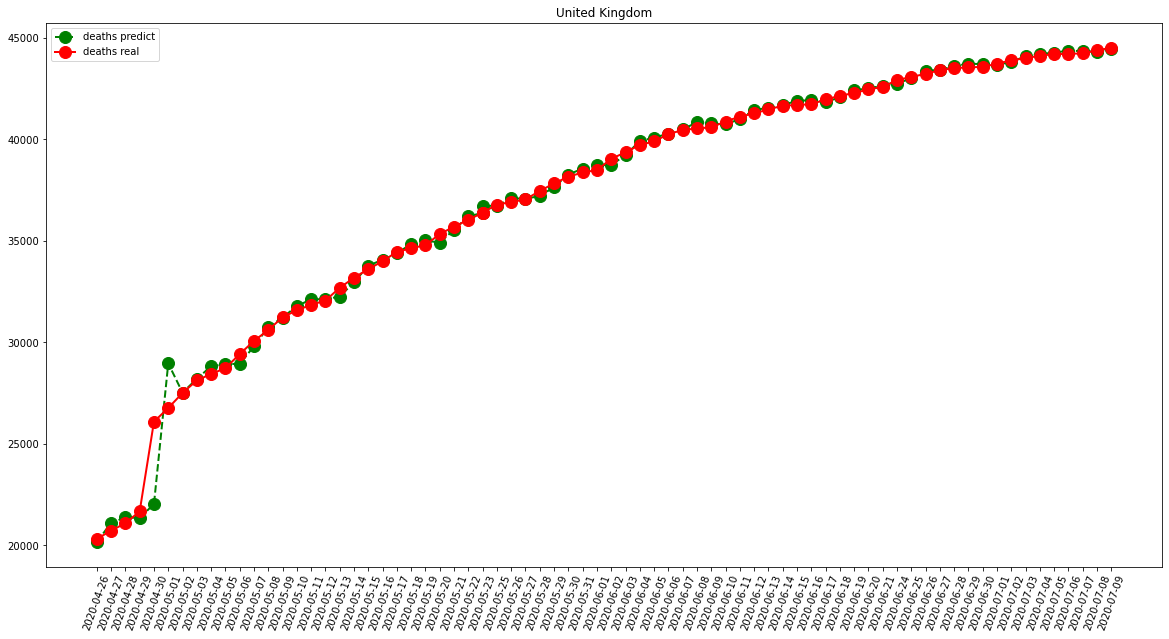

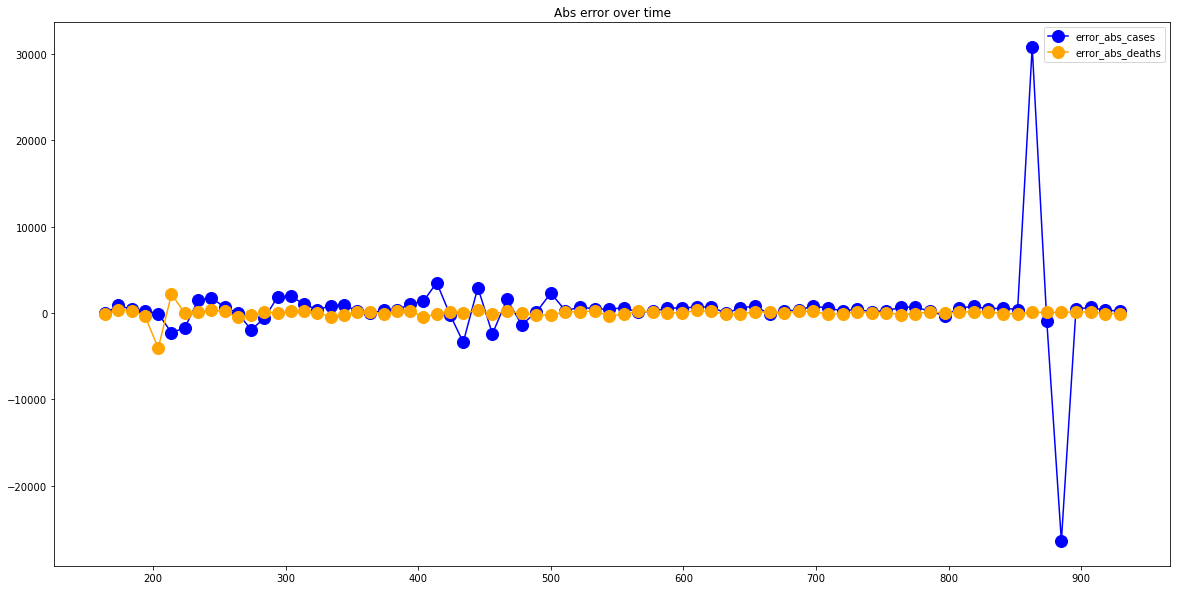

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  303.5890410958904
RMSE =  433.3754106722513
-- Germany performances for deaths --
MAE =  30.54794520547945
RMSE =  50.88315920234276


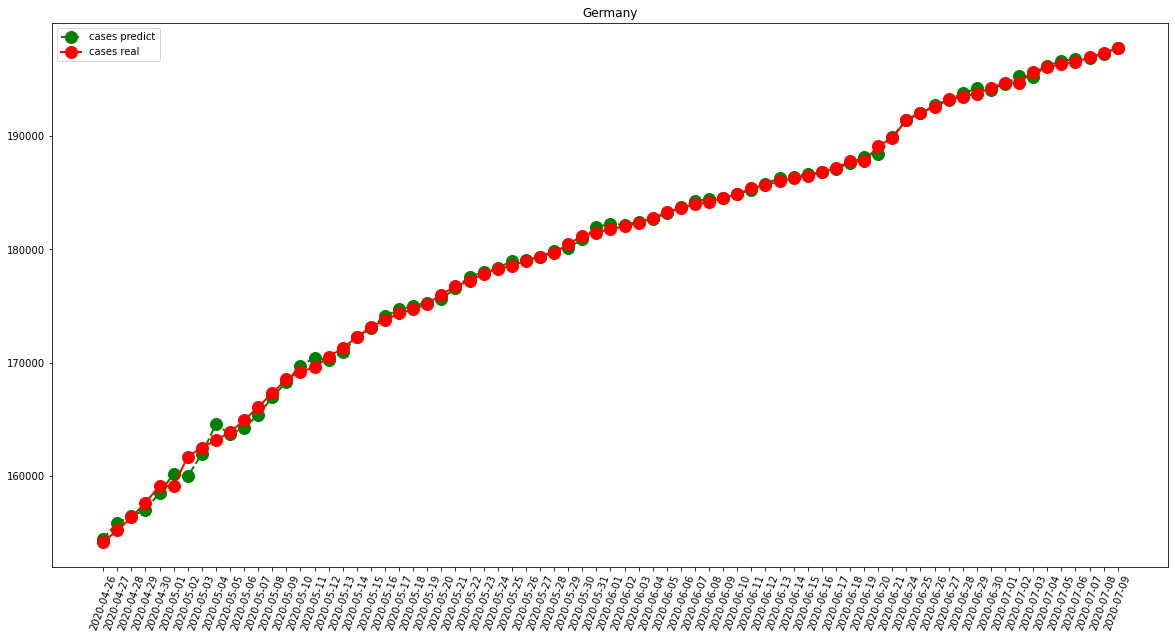

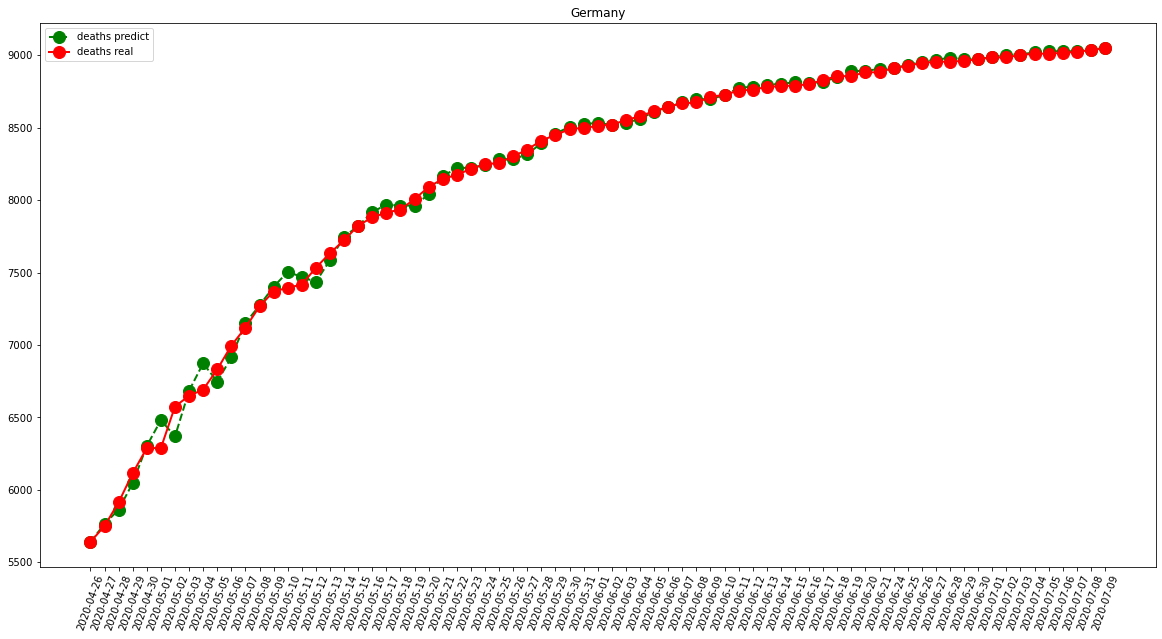

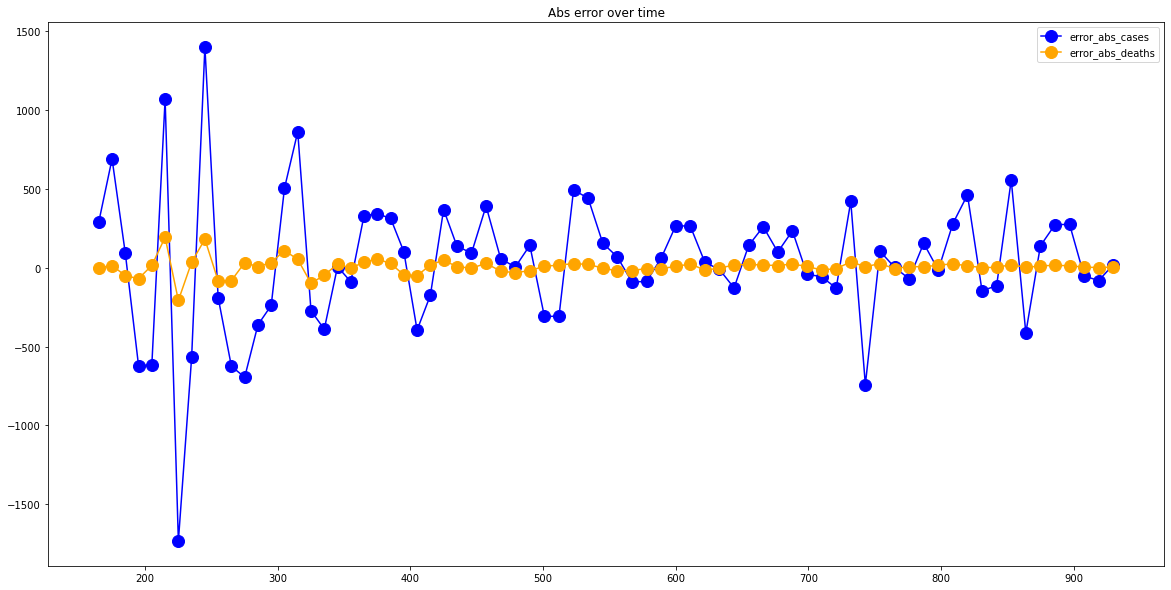

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  301.6575342465753
RMSE =  378.5525605459438
-- Iran performances for deaths --
MAE =  18.246575342465754
RMSE =  29.388283938956224


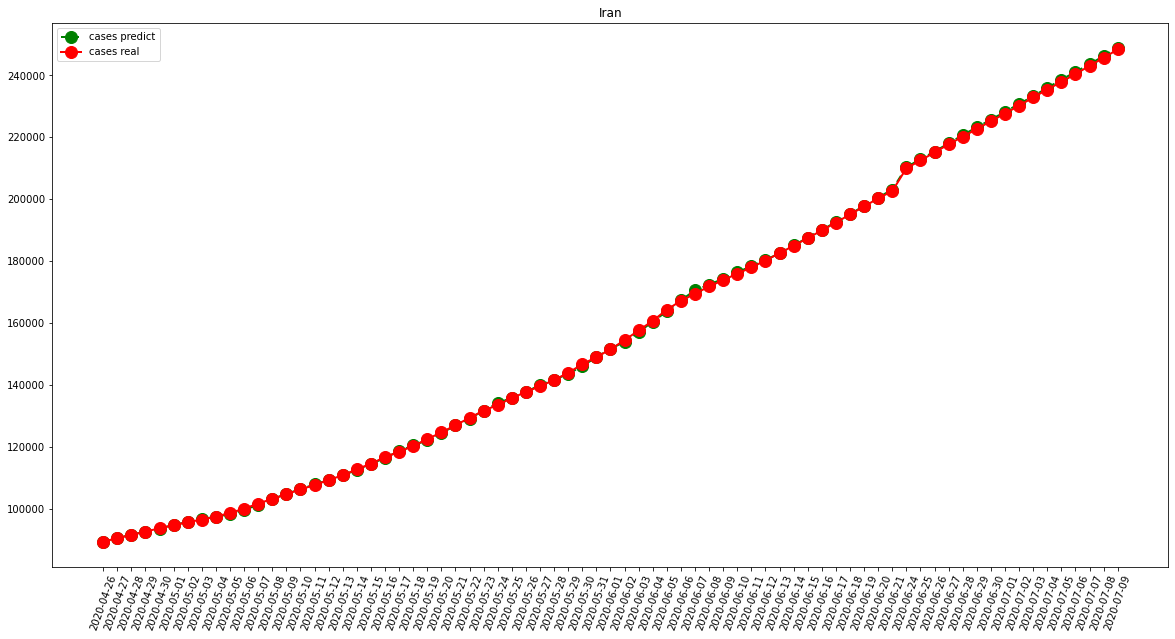

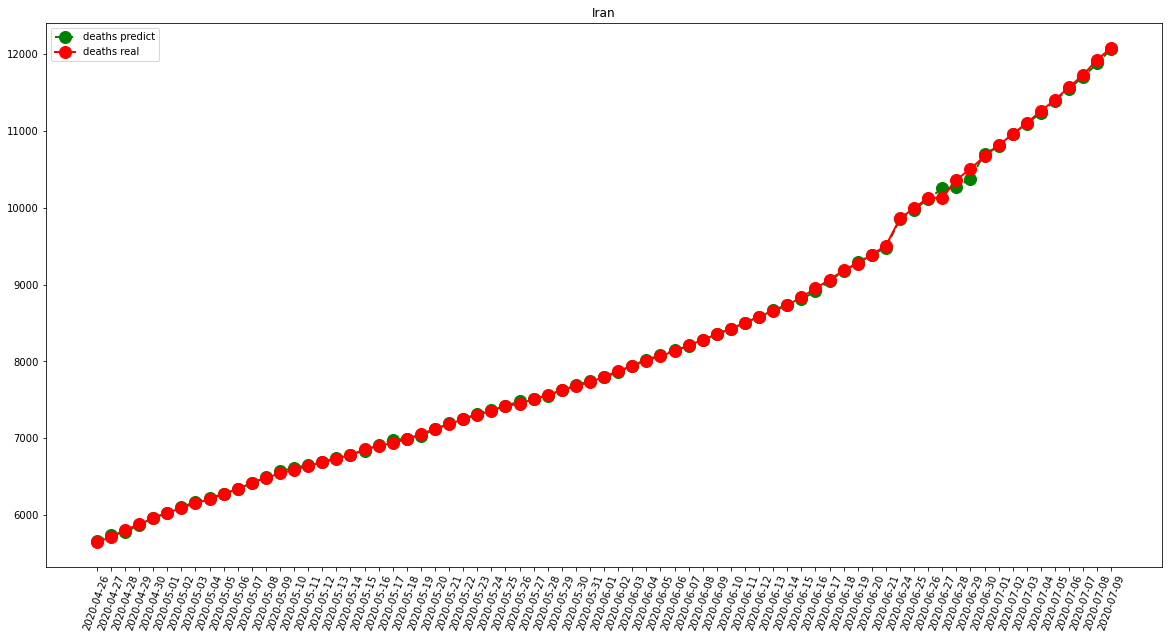

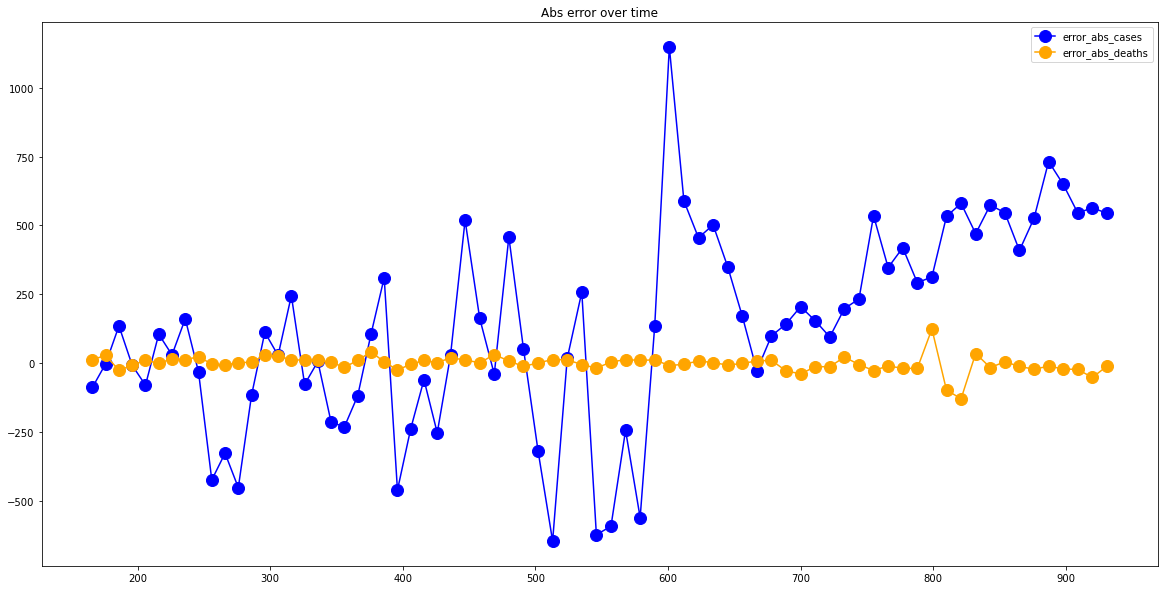

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  255.64383561643837
RMSE =  401.8808178811498
-- Turkey performances for deaths --
MAE =  25.28767123287671
RMSE =  118.80178034734425


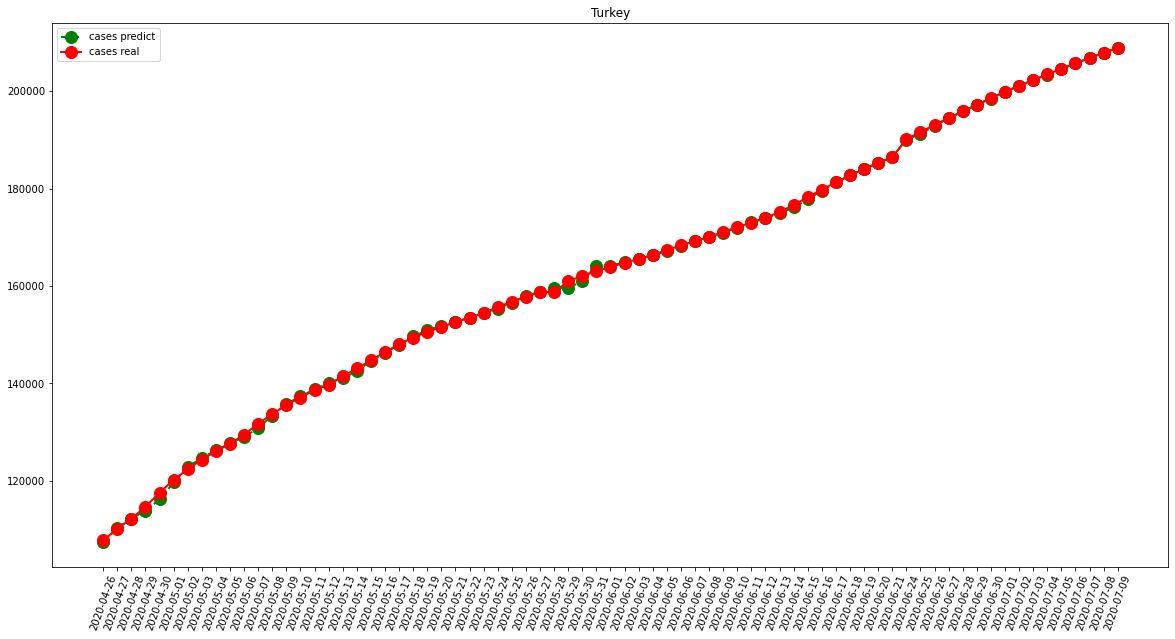

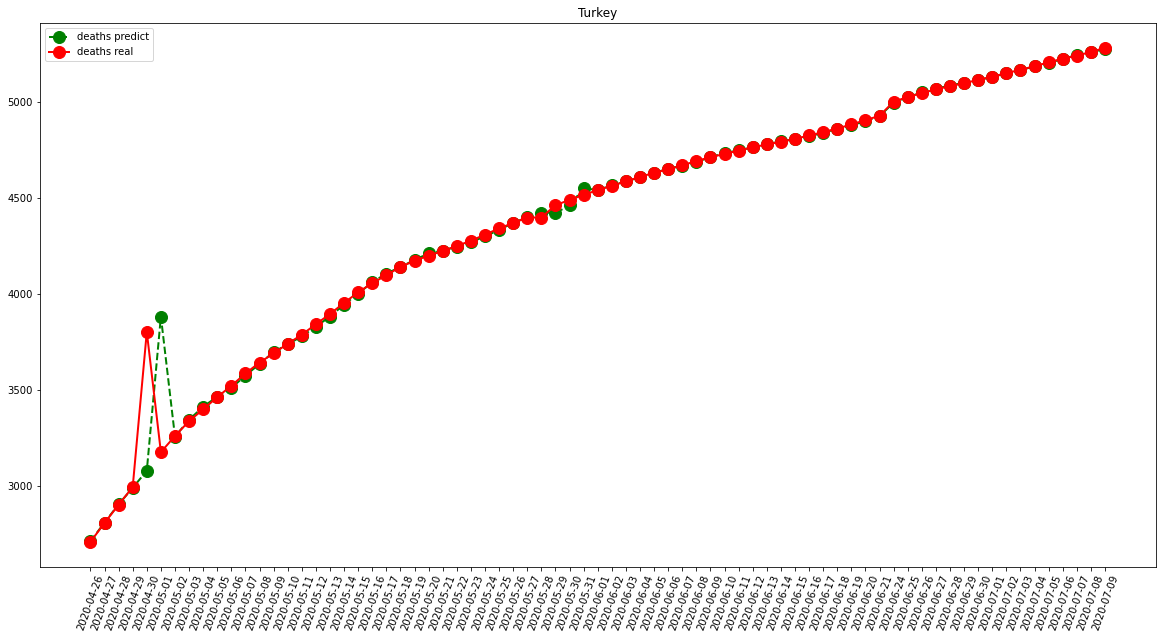

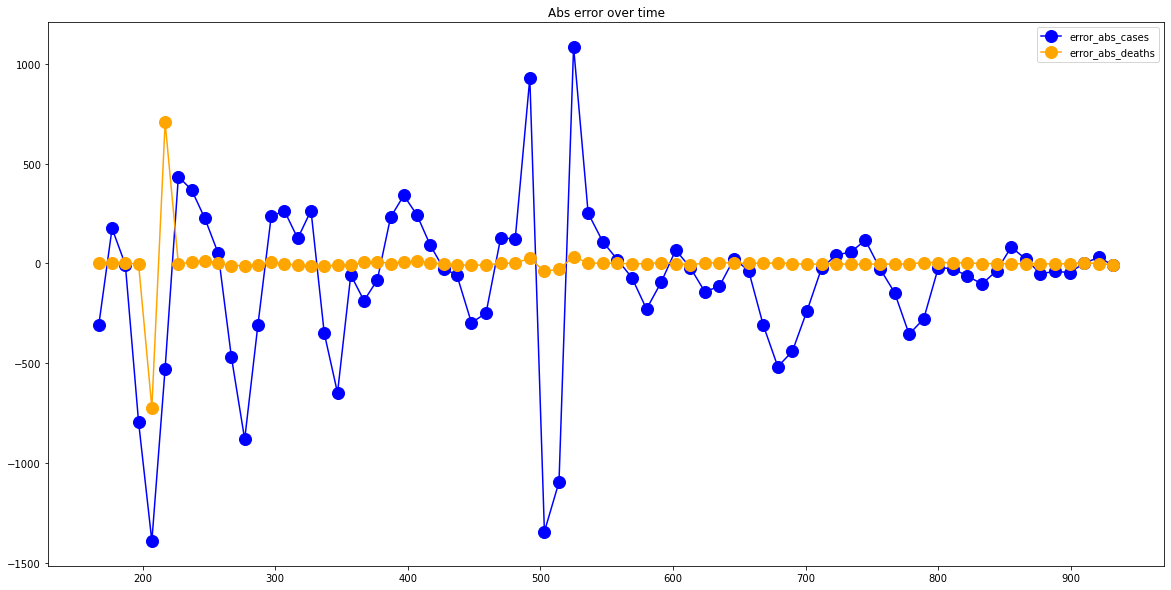

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9203.41304347826
RMSE =  11953.235455215718
-- Brazil performances for deaths --
MAE =  376.2826086956522
RMSE =  466.34035434107193


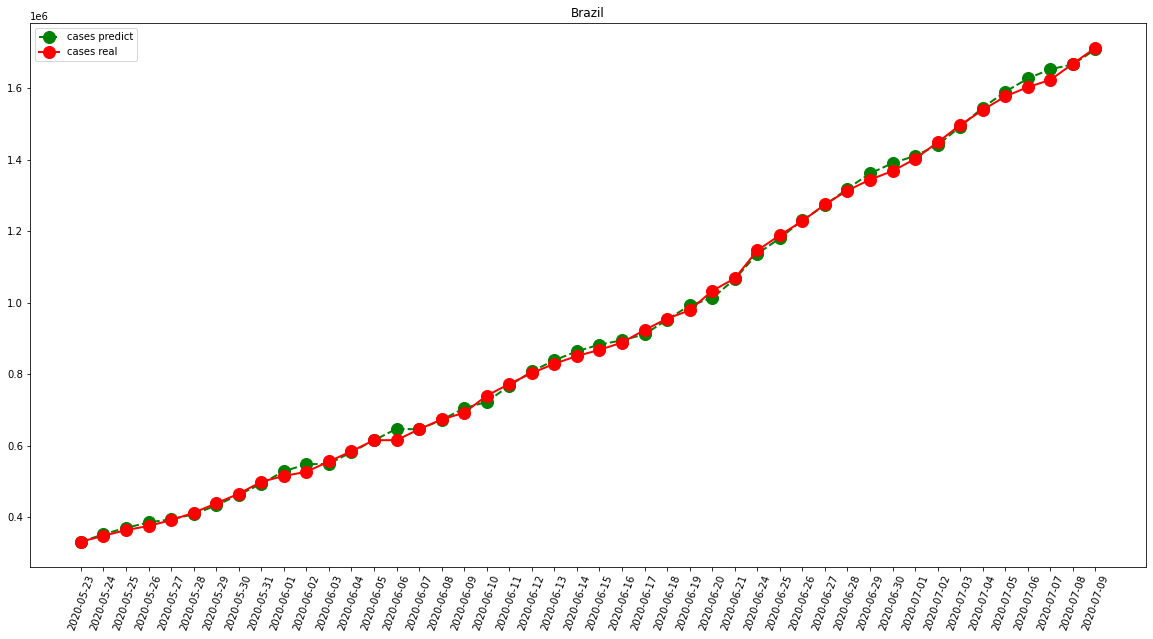

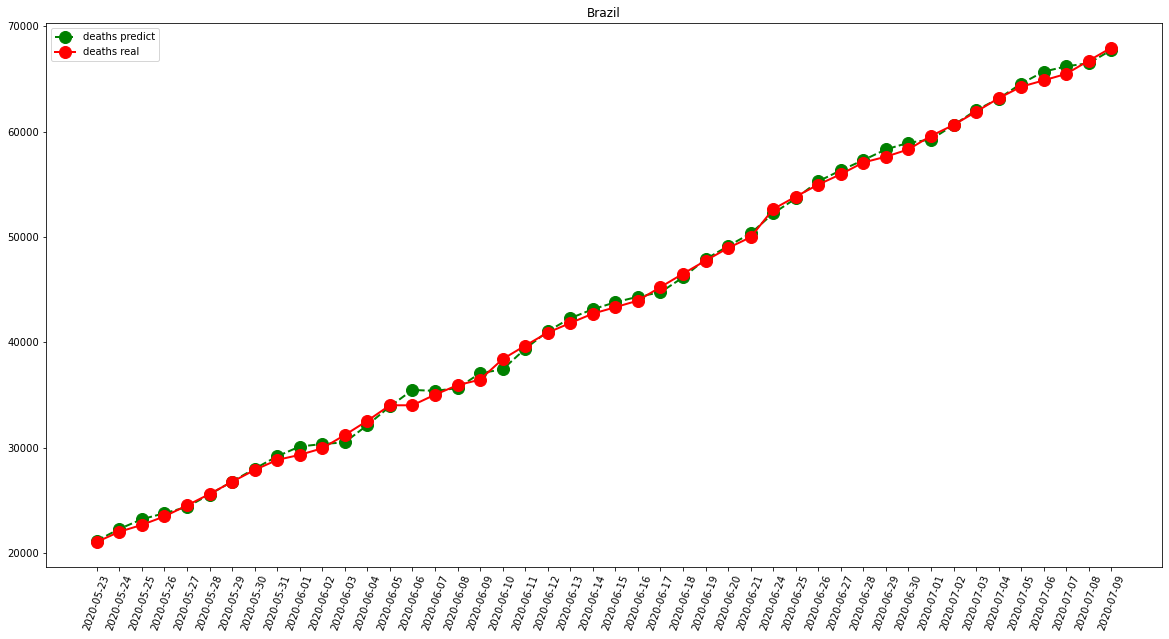

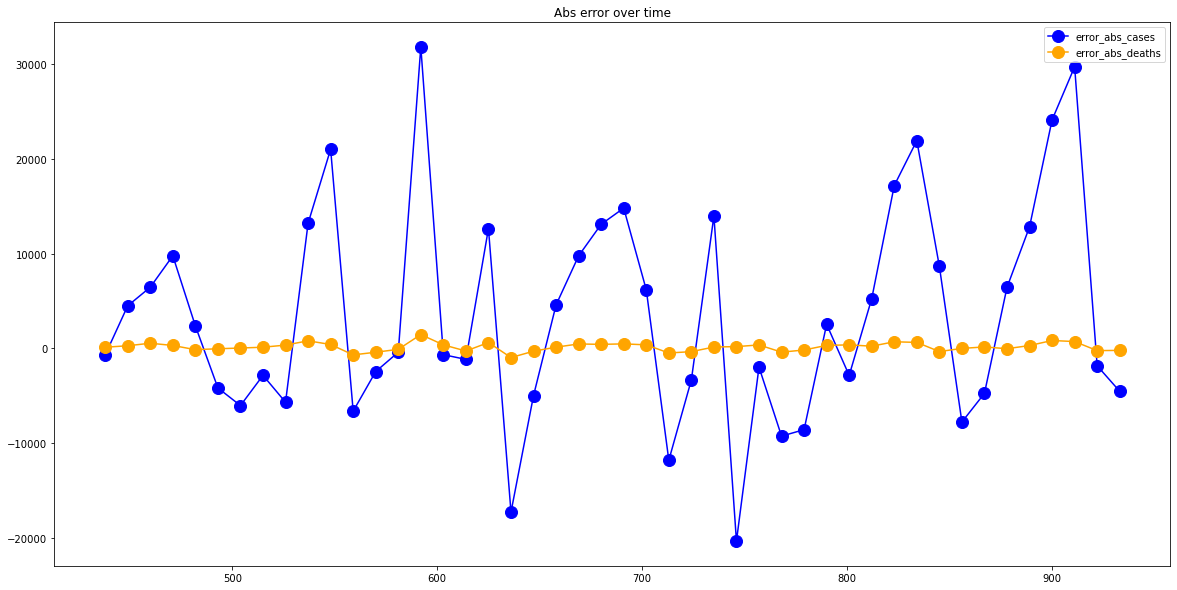

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)